In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ferdinjoe/IoT-Based-Weather-Monitoring-for-Effective-Analytics/master/html/aqidata.csv')

In [4]:
df

,time,PM2.5,PM10,temperature,humidity
0,2019-03-12 15:45:48.808907,10.8,11.8,25.0,68.0
1,2019-03-12 16:45:51.454505,8.6,9.3,26.0,64.0
2,2019-03-12 17:45:56.766252,17.6,19.1,27.0,61.0
3,2019-03-12 18:46:02.256138,8.6,9.5,27.0,59.0
4,2019-03-12 19:46:04.924692,16.0,17.5,27.0,63.0
...,...,...,...,...,...
134,2019-03-18 08:00:08.017041,19.1,20.9,29.0,81.0
135,2019-03-18 09:00:20.498216,18.7,20.4,29.0,80.0
136,2019-03-18 10:00:35.759471,18.3,20.0,29.0,78.0
137,2019-03-18 11:00:16.053312,18.4,20.1,29.0,78.0


In [5]:
df.describe()

,PM2.5,PM10,temperature,humidity
count,139.000000,139.000000,139.000000,139.000000
mean,13.989209,15.486331,27.791367,75.266187
std,5.178743,5.610900,1.132362,7.282673
min,3.600000,3.900000,22.000000,11.000000
25%,8.600000,9.450000,27.000000,74.000000
50%,16.100000,17.800000,28.000000,77.000000
75%,18.700000,20.400000,28.000000,79.000000
max,19.500000,24.800000,30.000000,82.000000


In [9]:
df.dtypes

time            object
PM2.5          float64
PM10           float64
temperature    float64
humidity       float64
dtype: object

In [15]:
#70:30
train = df.iloc[0:110,:]
test = df.iloc[111:,:]

In [139]:
#Linear regression with PM 2.5

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = np.array(train['PM2.5'])
model25 = LinearRegression().fit(x,y)
r_sq = model25.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model25.intercept_)
print('slope:', model25.coef_)
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = model25.predict(x_test)
print('predicted response:', y_pred, sep='\n')

coefficient of determination: 0.15336225019657668
intercept: 9.31007371007371
slope: [0.06333476]
predicted response:
[16.27689741 16.34023218 16.40356694 16.4669017  16.53023646 16.59357122
 16.65690598 16.72024074 16.7835755  16.84691026 16.91024502 16.97357978
 17.03691455 17.10024931 17.16358407 17.22691883 17.29025359 17.35358835
 17.41692311 17.48025787 17.54359263 17.60692739 17.67026216 17.73359692
 17.79693168 17.86026644 17.9236012  17.98693596 18.05027072]


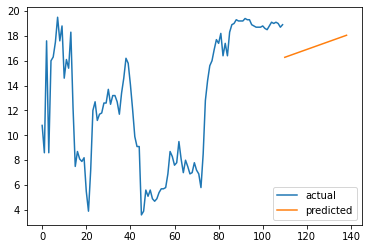

In [130]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

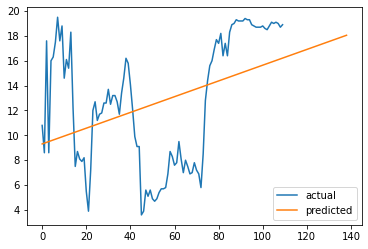

In [131]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = model25.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

In [132]:
#Multiple regression with humidity and pm2.5

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = train[['humidity','PM2.5']]
modelHnPM = LinearRegression().fit(x,y)
r_sq = modelHnPM.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelHnPM.intercept_)
print('slope:', modelHnPM.coef_)

coefficient of determination: 0.09738276809204766
intercept: [73.33611794  9.31007371]
slope: [[0.03236481]
 [0.06333476]]


In [133]:
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[76.89624687 16.27689741]
 [76.92861168 16.34023218]
 [76.96097649 16.40356694]
 [76.9933413  16.4669017 ]
 [77.02570611 16.53023646]
 [77.05807091 16.59357122]
 [77.09043572 16.65690598]
 [77.12280053 16.72024074]
 [77.15516534 16.7835755 ]
 [77.18753015 16.84691026]
 [77.21989496 16.91024502]
 [77.25225977 16.97357978]
 [77.28462457 17.03691455]
 [77.31698938 17.10024931]
 [77.34935419 17.16358407]
 [77.381719   17.22691883]
 [77.41408381 17.29025359]
 [77.44644862 17.35358835]
 [77.47881343 17.41692311]
 [77.51117823 17.48025787]
 [77.54354304 17.54359263]
 [77.57590785 17.60692739]
 [77.60827266 17.67026216]
 [77.64063747 17.73359692]
 [77.67300228 17.79693168]
 [77.70536709 17.86026644]
 [77.73773189 17.9236012 ]
 [77.7700967  17.98693596]
 [77.80246151 18.05027072]]


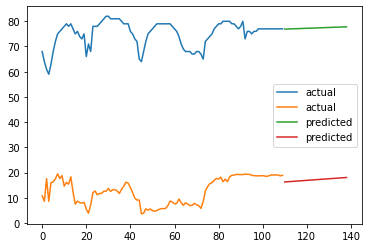

In [134]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

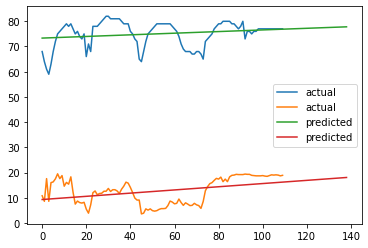

In [138]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

In [143]:
#multiple regression with temperature and humidity

x = np.array(list(range(0,train['PM2.5'].count()))).reshape(-1, 1)
y = train[['temperature','humidity']]
modelHnPM = LinearRegression().fit(x,y)
r_sq = modelHnPM.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelHnPM.intercept_)
print('slope:', modelHnPM.coef_)

coefficient of determination: 0.06990009047942203
intercept: [26.94840295 73.33611794]
slope: [[0.01095508]
 [0.03236481]]


In [144]:
x_test = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[28.15346122 76.89624687]
 [28.16441629 76.92861168]
 [28.17537137 76.96097649]
 [28.18632644 76.9933413 ]
 [28.19728152 77.02570611]
 [28.20823659 77.05807091]
 [28.21919167 77.09043572]
 [28.23014674 77.12280053]
 [28.24110182 77.15516534]
 [28.25205689 77.18753015]
 [28.26301197 77.21989496]
 [28.27396704 77.25225977]
 [28.28492212 77.28462457]
 [28.29587719 77.31698938]
 [28.30683227 77.34935419]
 [28.31778735 77.381719  ]
 [28.32874242 77.41408381]
 [28.3396975  77.44644862]
 [28.35065257 77.47881343]
 [28.36160765 77.51117823]
 [28.37256272 77.54354304]
 [28.3835178  77.57590785]
 [28.39447287 77.60827266]
 [28.40542795 77.64063747]
 [28.41638302 77.67300228]
 [28.4273381  77.70536709]
 [28.43829317 77.73773189]
 [28.44924825 77.7700967 ]
 [28.46020332 77.80246151]]


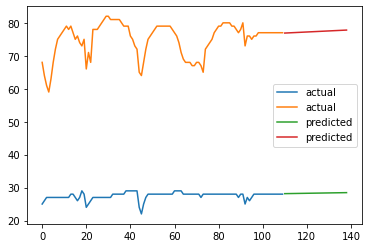

In [145]:
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

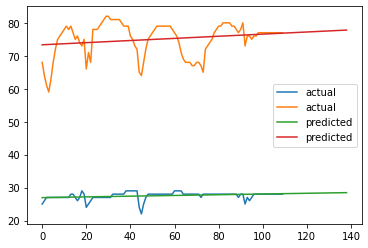

In [146]:
#wholeset

x_test = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
y_pred = modelHnPM.predict(x_test)
plt.plot(x, y, label = "actual")
plt.plot(x_test, y_pred, label = "predicted")
plt.legend()
plt.show()

In [117]:
#polynominal regression with temperature
from sklearn.preprocessing import PolynomialFeatures

#train transform
x = np.array(list(range(0,train['temperature'].count()))).reshape(-1, 1)
y = np.array(train['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(x)
x_=transformer.transform(x)
x_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(x)

#test transform
testx = np.array(list(range(train['PM2.5'].count(),df['PM2.5'].count()))).reshape(-1, 1)
testy = np.array(test['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(testx)
testx_=transformer.transform(testx)
testx_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(testx)

#wholeset transform
wholex = np.array(list(range(0,df['PM2.5'].count()))).reshape(-1, 1)
wholey = np.array(df['temperature'])
transformer=PolynomialFeatures(degree=2,include_bias=False)
transformer.fit(wholex)
wholex_=transformer.transform(wholex)
wholex_=PolynomialFeatures(degree=2,include_bias=False).fit_transform(wholex)

In [113]:
modelPoly25 = LinearRegression().fit(x_,y)
r_sq = modelPoly25.score(x_, y)
print('coefficient of determination:', r_sq)
print('intercept:', modelPoly25.intercept_)
print('slope:', modelPoly25.coef_)

coefficient of determination: 0.1408990758927866
intercept: 26.4509477009477
slope: [ 0.03859148 -0.00025354]


In [120]:
y_pred = modelPoly25.predict(testx_)
y_pred

array([27.62811602, 27.61067406, 27.59272501, 27.57426887, 27.55530563,
       27.53583531, 27.5158579 , 27.4953734 , 27.4743818 , 27.45288312,
       27.43087735, 27.40836449, 27.38534454, 27.36181749, 27.33778336,
       27.31324214, 27.28819383, 27.26263843, 27.23657594, 27.21000635,
       27.18292968, 27.15534592, 27.12725507, 27.09865713, 27.0695521 ,
       27.03993998, 27.00982076, 26.97919446, 26.94806107])

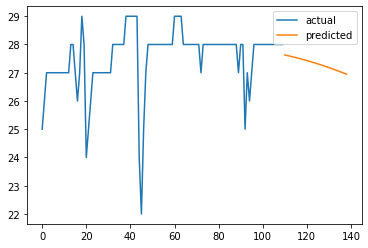

In [123]:
y_pred = modelPoly25.predict(testx_)
y_pred
plt.plot(x, y, label = "actual")
plt.plot(testx, y_pred, label = "predicted")
plt.legend()
plt.show()

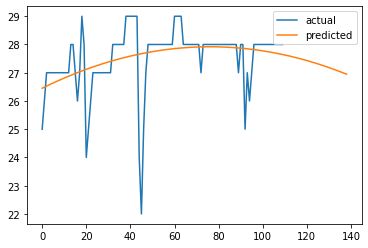

In [126]:
y_pred = modelPoly25.predict(wholex_)
y_pred
plt.plot(x, y, label = "actual")
plt.plot(df.index, y_pred, label = "predicted")
plt.legend()
plt.show()